# 1. Описание данных.
Международная e-commerce компания занимается продажей электроники. 

Колонки:
- Customer_care_calls - кол-во контактов клиента со службой поддержки;
- Customer_rating - рейтинг удовлетворенности клиента покупкой;
- Prior_purchases - кол-во предыдущих покупок на сайте;
- Discount_offered - предложенная скидка, в %;
- Weight_in_gms - вес покупки в граммах;
- Warehouse_block - склад;
- Mode_of_Shipment - способ доставки;
- Product_importance - приоритет по доставке (скорость и условия);
- Gender - пол клиента;
- Class - доставлен ли заказ вовремя.

# 2. Цели исследования.
- Посмотреть распределения и выбрать меры центральной тенденции для различных показателей, чтобы иметь представление о текущей ситуации;
- Найти взаимосвязи различных показателей между собой, чтобы понять, как и на какие метрики можно влиять.

Как итог, мы получим текущую картину, в которой можно будет увидеть слабые места и/или точки роста, и ряд гипотез, которые необходимо будет проверить (чем мы займемся в отдельном статистическом блоке, в отдельном файле репозитория), чтобы сделать предложения по улучшению работы компании.

# 3. Знакомство с данными.
Для начала посмотрим на данные, их типы, наличие пропусков, при необходимости скорректируем, приведем в более комфортный вид/формат. 

In [1]:
# импортируем необходимые для работы библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# выггрузим данные из датасета в датафрейм

df = pd.read_csv('shipping_ecommerce.csv')

In [3]:
# посмотрим на датафрейм

df.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


In [4]:
# для более комфортной и быстрой работы приведем названия колонок к snake_case

df.columns = df.columns.str.lower()

In [5]:
# посмотрим на типы, кол-во данных, наличие пропусков

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_care_calls  10998 non-null  int64 
 1   customer_rating      10998 non-null  int64 
 2   prior_purchases      10998 non-null  int64 
 3   discount_offered     10998 non-null  int64 
 4   weight_in_gms        10998 non-null  int64 
 5   warehouse_block      10998 non-null  object
 6   mode_of_shipment     10998 non-null  object
 7   product_importance   10998 non-null  object
 8   gender               10998 non-null  object
 9   class                10998 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.3+ KB


Пропущенных значений в датасете нет.

In [6]:
# посмотрим на колонки со строковыми значениями

df[['warehouse_block', 
    'mode_of_shipment', 
    'product_importance', 
    'gender']]

,warehouse_block,mode_of_shipment,product_importance,gender
0,A,Ship,medium,M
1,F,Ship,medium,F
2,D,Ship,medium,M
3,D,Ship,medium,M
4,B,Ship,medium,M
...,...,...,...,...
10993,F,Road,medium,M
10994,D,Flight,low,M
10995,F,Ship,medium,M
10996,F,Flight,medium,M


In [7]:
# для удобства приведем значения этих колонок к нижнему регистру

for i in df[['warehouse_block',
             'mode_of_shipment',
             'gender']]:
    df[i] = df[i].str.lower()

In [8]:
df.head()

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,warehouse_block,mode_of_shipment,product_importance,gender,class
0,5,4,2,10,5395,a,ship,medium,m,1
1,4,3,2,6,5867,f,ship,medium,f,0
2,3,4,2,2,5957,d,ship,medium,m,0
3,3,1,2,27,2551,d,ship,medium,m,1
4,7,5,4,9,1329,b,ship,medium,m,1


# 4.1. Распределения и меры центральной тенденции.
Посмотрим на описательные характеристики данных, в т.ч. на разбросы значений, на распределения, определимся с наиболее подходящими мерами центральной тенденции, чтобы грубо описать текущую картину.

In [9]:
# посмотрим на описательные характеристики числовых значений (хотя class здесь по сути является номинативной переменной)

df.describe()

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,class
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
# посмотрим на их распределения
# для удобства создадим функцию, которая возвращает таблицу с процентами

def create_hist(column):
    '''Принимает колонку column вида 'df.column', возвращает ее гистограмму'''
    return sns.histplot(column, 
                        color='green', 
                        alpha=0.7, 
                        binwidth=1,
                        discrete=True)

[Text(0.5, 0, 'Контакты со Службой Поддержки'), Text(0, 0.5, 'Заказы')]

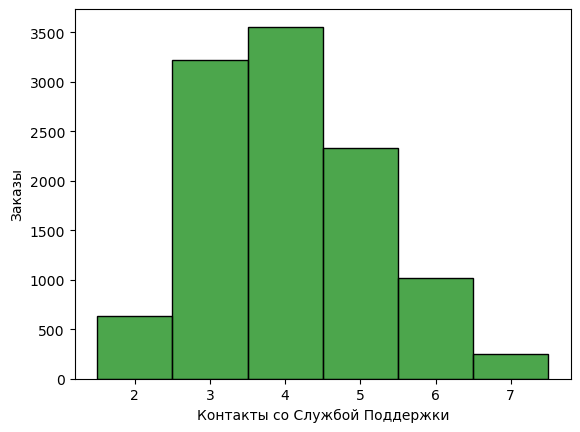

In [11]:
# Customer Care Calls - кол-во контактов со службой поддержки

customer_care_calls_hist = create_hist(df.customer_care_calls)
customer_care_calls_hist.set(xlabel='Контакты со Службой Поддержки', 
                             ylabel='Заказы')

In [12]:
# для удобства создадим функцию, которая возвращает таблицу с процентами

def perc_table(column):
    '''Принимает колонку column вида 'df.column', возвращает таблицу с долями ее значений в процентах'''
    return column.value_counts(normalize=True) \
                 .mul(100) \
                 .round(1) \
                 .reset_index() \
                 .rename(columns={'index': column.name, 
                                  column.name: 'percentage'})

In [13]:
perc_table(df.customer_care_calls)

,customer_care_calls,percentage
0,4,32.3
1,3,29.2
2,5,21.2
3,6,9.2
4,2,5.8
5,7,2.2


Распределение похоже на логнормальное, поэтому, выбирая меру центральной тенденции, остановимся на среднем или медиане, при этом у него нет длинных хвостов, выбросов, поэтому они примерно равны.
Будем считать, что в среднем один заказ сопровождается 4мя контактами со службой поддержки. Более 80% заказов - от 4 до 6 контактов.

Мы можем использовать эту информации, например, при планировании загрузки службы поддержки.

[Text(0.5, 0, 'Рейтинг удовлетворенности'), Text(0, 0.5, 'Заказы')]

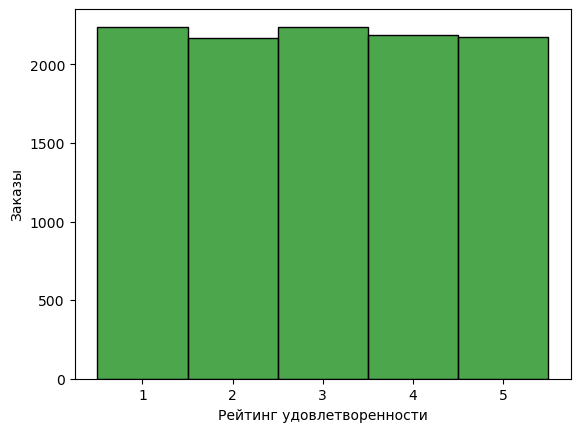

In [14]:
# Customer Rating - рейтинг удовлетворенности заказом

customer_rating_hist = create_hist(df.customer_rating)
customer_rating_hist.set(xlabel='Рейтинг удовлетворенности', 
                         ylabel='Заказы')

In [15]:
perc_table(df.customer_rating)

,customer_rating,percentage
0,3,20.4
1,1,20.3
2,4,19.9
3,5,19.7
4,2,19.7


Распределение похоже на равномерное, поэтому логично, что среднее и медиана примерно равны. Средний рейтинг удовлетворенности заказом среди наших клиентов - 3 балла из 5 возможных.

Очевидно, что данное распределение - это не очень хорошо для нас, нам бы хотелось роста в правой части и низких показателей в левой, а по факту у нас средняя оценка - 'удовлетворительно', но что самое важное - примерно 2/5 наших заказов клиенты не довольны, что может привести к повышению Churn Rate и ухудшению других метрик.

[Text(0.5, 0, 'Предыдущие заказы'), Text(0, 0.5, 'Заказы')]

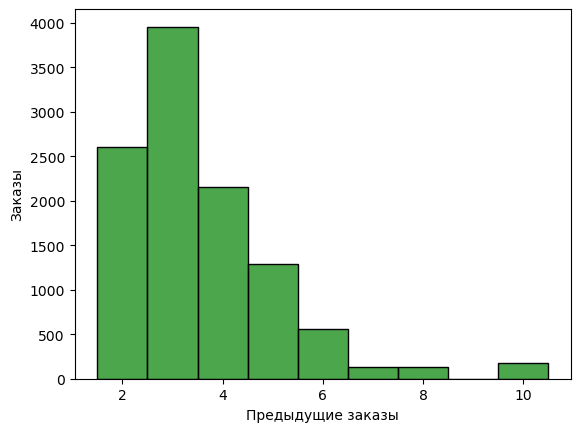

In [16]:
# Prior Purchases - кол-во предыдущих заказов

prior_purchases_hist = create_hist(df.prior_purchases)
prior_purchases_hist.set(xlabel='Предыдущие заказы', 
                         ylabel='Заказы')

In [17]:
perc_table(df.prior_purchases)

,prior_purchases,percentage
0,3,36.0
1,2,23.6
2,4,19.6
3,5,11.7
4,6,5.1
5,10,1.6
6,7,1.2
7,8,1.2


Распределение похоже на логнормальное, справа есть длинный хвост, выбросы, поэтому оптимальной мерой центральной тенденции в данном случае будет медиана, т.е. ориентируемся на то, что на момент заказа у половины наших клиентов сделано ранее более 3,5 заказов, для другой половины - менее, для простоты интерпретации можно взять среднее, которое в данном случае сильно не отличается и равняется 3м заказам. Около 80% заказов являются повторными после 2-4 предыдущих.

В наших данных нет клиентов без предыдущих заказов, все они делают по несколько покупок. Исходя из этого, LTV этих клиентов находится на более высоком уровне, чем в модели, где есть много случайных и новых клиентов, поэтому показатель удовлетворенности, который находится в плачевном состоянии, для нас вдвойне важен, потеря одного клиента обходится нам очень дорого.

[Text(0.5, 0, 'Предложенная скидка'), Text(0, 0.5, 'Заказы')]

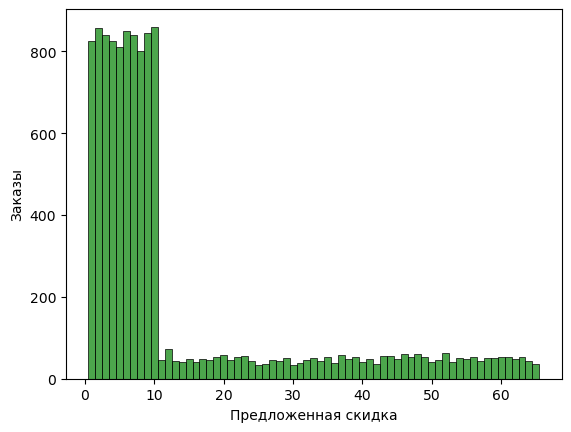

In [18]:
# Discount Offered - предложенная скидка

discount_offered_hist = create_hist(df.discount_offered)
discount_offered_hist.set(xlabel='Предложенная скидка', 
                          ylabel='Заказы')

Это распределение похоже на составное из 2х равномерных. Из-за длины хвоста среднее здесь будет наименее информативно. Можно ориентироваться на медиану равную скидке в размере 7%. Но, на мой взгляд, гораздо интереснее будет выделить два диапазона - 1-10% и 10%+ и посмотреть какие доли имеют эти диапазоны в общем количестве заказов.

In [19]:
round((df[df.discount_offered <= 10].shape[0] / len(df)) * 100, 1)

75.9

По скидкам можно сказать, что на 76% заказов была предложена скидка до 10%, на остальные 24% - от 11% до 65%.

В отрыве от остальной информации это особой пользы не несет, но позже может пригодиться.

[Text(0.5, 0, 'Вес в граммах'), Text(0, 0.5, 'Заказы')]

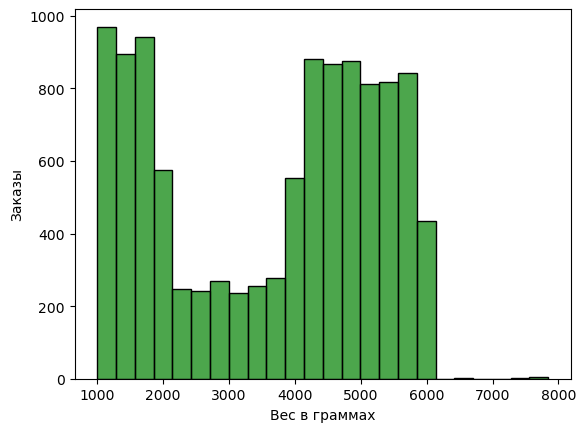

In [20]:
# Weight in Grams - вес в граммах

weight_in_gms_hist = sns.histplot(df.weight_in_gms, 
                                  color='green', 
                                  alpha=0.7)
weight_in_gms_hist.set(xlabel='Вес в граммах', 
                       ylabel='Заказы')

Распределение похоже на бимодальное, здесь среднее или медиана не дадут абсолютно ничего, поэтому выделим 4 диапазона и посчитаем для них доли:
1. До 2 кг;
2. 2-4 кг;
3. 4-6 кг;
4. Более 6 кг.

In [21]:
pd.cut(df.weight_in_gms, [0, 2000, 4000, 6000, float('inf')]) \
  .value_counts(normalize=True) \
  .mul(100) \
  .round(1)

(4000.0, 6000.0]    54.2
(0.0, 2000.0]       29.5
(2000.0, 4000.0]    16.3
(6000.0, inf]        0.1
Name: weight_in_gms, dtype: float64

В итоге получаем то, что более половины заказов находится в диапазоне 4-6 кг, около трети до 2 кг, около 15% 2-4 кг и менее 1% более 6 кг.

Мы можем учитывать эту информацию для определения кол-ва сотрудников и техники на складах, а также требований к ним.

Поскольку переменная Class, несмотря на числовые значения, по смыслу является номинативной, на данном этапе нет смысла что-либо рассчитывать за рамками известных уже нам значений: около 60% заказов доставляются вовремя, из чего можно сделать первоначальный вывод, что служба доставки справляется не очень хорошо.

In [22]:
# посмотрим на другие номинативные переменные
# Warehouse Block - склад

print(df.warehouse_block.unique())

['a' 'f' 'd' 'b' 'c']


In [23]:
# здесь также создадим функцию для создания countplot

def create_cp(column):
    '''Принимает колонку column вида 'df.column', возвращает ее countplot'''
    return sns.countplot(y=column,
                         color='green', 
                         alpha=0.7,
                         order=column.value_counts().index)

[Text(0.5, 0, 'Заказы'), Text(0, 0.5, 'Склад')]

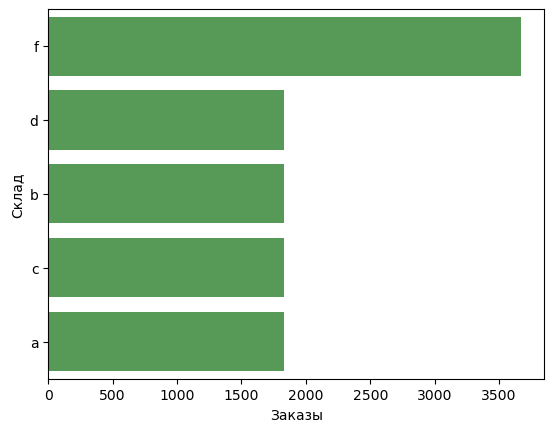

In [24]:
warehouse_block_cp = create_cp(df.warehouse_block)
warehouse_block_cp.set(xlabel='Заказы', 
                       ylabel='Склад')

In [25]:
perc_table(df.warehouse_block)

,warehouse_block,percentage
0,f,33.3
1,d,16.7
2,b,16.7
3,c,16.7
4,a,16.7


Со склада F отправляется примерно в 2 раза больше заказов, чем с любого другого. Все остальные распределены равномерно.

Мы можем учитывать это при оптимизации логистических процессов.

In [26]:
# тип доставки

print(df.mode_of_shipment.unique())

['ship' 'road' 'flight']


[Text(0.5, 0, 'Заказы'), Text(0, 0.5, 'Тип доставки')]

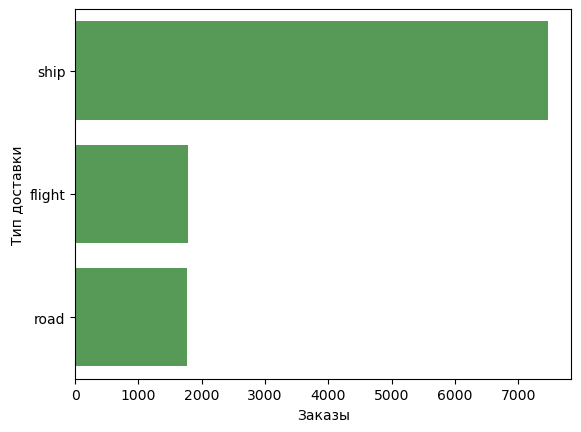

In [27]:
mode_of_shipment_cp = create_cp(df.mode_of_shipment)
mode_of_shipment_cp.set(xlabel='Заказы', 
                        ylabel='Тип доставки')

In [28]:
perc_table(df.mode_of_shipment)

,mode_of_shipment,percentage
0,ship,67.8
1,flight,16.2
2,road,16.0


Около 2/3 доставок происходят по морю. Возможно, это одна из причин того, что мы не доставляем заказы в срок, тк из 3х представленных вариантов этот кажется наиболее долгим и наименее точным по времени.

In [29]:
# приоритеты по доставке

print(df.product_importance.unique())

['medium' 'low' 'high']


[Text(0.5, 0, 'Заказы'), Text(0, 0.5, 'Приоритет по доставке')]

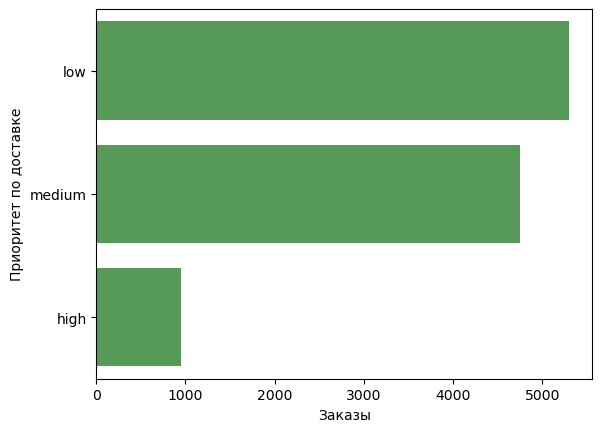

In [30]:
product_importance_cp = create_cp(df.product_importance)
product_importance_cp.set(xlabel='Заказы', 
                          ylabel='Приоритет по доставке')

In [31]:
perc_table(df.product_importance)

,product_importance,percentage
0,low,48.2
1,medium,43.2
2,high,8.6


Более 90% заказов имеет низкий и средний приоритеты по доставке. Возможно, это одна из причин задержек.

In [32]:
# пол клиентов

print(df.gender.unique())

['m' 'f']


In [33]:
perc_table(df.gender)

,gender,percentage
0,f,50.4
1,m,49.6


Кол-во заказов от мужчин и от женщин примерно равны.

# Распределения и меры центральной тенденции. Резюме.

- в среднем один заказ сопровождается 4мя контактами со службой поддержки. Более 80% заказов - от 4 до 6 контактов.
- средний рейтинг удовлетворенности заказом среди наших клиентов - 3 балла из 5 возможных.
- около 80% заказов являются повторными после 2-4 предыдущих.
- на 76% заказов была предложена скидка до 10%, на остальные 24% - от 11% до 65%.
- более половины заказов находится в диапазоне 4-6 кг, около трети до 2 кг, около 15% 2-4 кг и менее 1% более 6 кг.
- около 60% заказов доставляются вовремя
- со склада F отправляется примерно в 2 раза больше заказов, чем с любого другого. Все остальные распределены равномерно.
- около 2/3 доставок происходят по морю.
- более 90% заказов имеет низкий и средний приоритеты по доставке.
- кол-во заказов от мужчин и от женщин примерно равны.

# 4.3. Поиск взаимосвязей.
Выдвинем ряд идей (не статистических гипотез) о возможных взаимосвязях, посмотрим на цифры и графики, чтобы отобрать рабочие варианты для проведения статистических тестов и формирования модели на следующем этапе.

# 4.3.1. Рейтинг удовлетворенности.
Посмотрим на взаимосвязи рейтинга и других показателей.

Кол-во контактов с СП может влиять положительно на удовлетворенность, тк служба оказывает помощь, решает проблемы, иногда успокаивает, дарит подарки и т.п., но в то же время может быть и обратный эффект - люди в-основном обращаются за помощью, когда у них возникают проблемы, а это уже негативный оттенок. 

Если бы у нас была информация о входящих/исходящих звонках, о времени относительно выполнения заказа - можно было бы сделать более точное предположение.

In [66]:
# создадим функцию, которая группирует значения и выводит средний рейтинг

def avg_rating(column):
    '''Принимает колонку column вида 'df.column', возвращает таблицу со средним рейтингом'''
    return df.groupby(column, as_index=False).customer_rating.mean()

In [67]:
# и функцию, которая будет возвращать барплот

def creat_bp(data):
    '''Принимает датафрейм data, возвращает барчарт'''
    return sns.barplot(x=data[data.columns[0]], 
                       y=data[data.columns[1]],
                       color='green', 
                       alpha=0.7)

In [68]:
# посмотрим на средние значения рейтинга для разного количества звонков

calls_rating = avg_rating(df.customer_care_calls)

In [73]:
calls_rating

,customer_care_calls,customer_rating
0,2,3.017241
1,3,2.959577
2,4,2.998032
3,5,2.972938
4,6,3.083909
5,7,2.995935


[Text(0.5, 0, 'Контакты со Службой Поддержки'),
 Text(0, 0.5, 'Средний рейтинг заказа')]

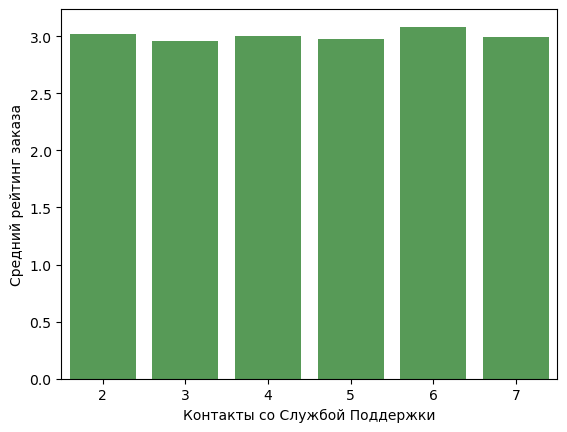

In [69]:
calls_rating_bp = creat_bp(calls_rating)
calls_rating_bp.set(xlabel='Контакты со Службой Поддержки',
                    ylabel='Средний рейтинг заказа')

Различия между группами минимальны, при этом какой-то направленности не наблюдается.

Кол-во предыдущих покупок может положительно влиять на рейтинг, тк кажется, что чем больше покупок совершил клиент, тем больше вероятность, что в-целом он доволен нашим сервисом, он хорошо с ним знаком и его все устраивает.

In [70]:
# посмотрим на средние значения рейтинга для разного количества предыдущих покупок

purchases_rating = avg_rating(df.prior_purchases)

In [71]:
purchases_rating

,prior_purchases,customer_rating
0,2,2.955752
1,3,2.997977
2,4,3.028784
3,5,2.941725
4,6,3.016043
5,7,2.867647
6,8,3.039062
7,10,3.196629


<AxesSubplot:xlabel='prior_purchases', ylabel='customer_rating'>

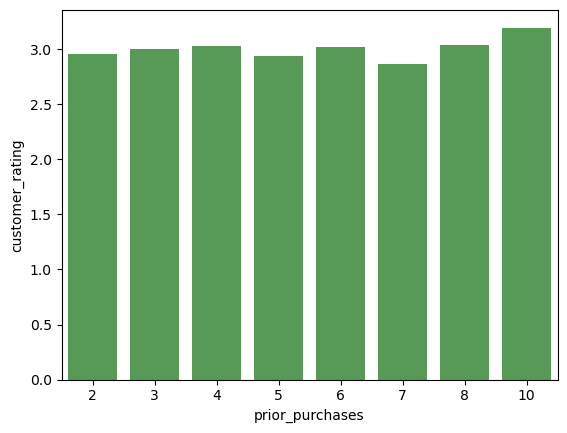

In [65]:
creat_bp(purchases_rating)

???